# Optimal number of FCs

Importing Required Libraries

In [ ]:
pip install --upgrade matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import pypsa
import random
import matplotlib.pyplot as plt
import copy

D:\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
zonexy=pd.read_excel("xy.xlsx",sheet_name="Sheet2")  ##Study Area Data
print(zonexy)

      sr  zone   x   y
0      1     0   0  11
1      2     3   0  10
2      3     7   0   9
3      4     6   0   8
4      5     4   0   7
..   ...   ...  ..  ..
175  176     6  14   4
176  177     8  14   3
177  178     3  14   2
178  179     0  14   1
179  180     4  14   0

[180 rows x 4 columns]


In [3]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")


In [4]:
busxy=pd.read_excel("bus1.xlsx")     ##Bus Data
print(busxy)

      sr  zone   x  y
0      1     7   0  9
1      2     7   0  5
2      3     8   0  3
3      4    11   1  9
4      5    13   1  6
..   ...   ...  .. ..
113  114    12  13  4
114  115    15  13  3
115  116    13  13  2
116  117     7  14  7
117  118     8  14  3

[118 rows x 4 columns]


In [5]:
def xyfc(ns):                        ##Funtion to place station Equdistantly
    
    x=118//(ns+1)
    xy=[]
    nos=x
    n=0
    while(n<ns):
    
        xcor=busxy['x'][nos-1]
        ycor=busxy['y'][nos-1]
        xy.append([xcor,ycor])
        nos+=x
        n+=1
    return(xy)

In [6]:
def s(j):                            ##Function for S(j)
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1

In [7]:
def sdc(cha):                         ##Function to calculate SDC
    
    val=70000+(25*240*s(cha))+(208.33*(s(cha)-1)*96)
    return val

In [8]:
def evuc(z):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=lis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=lis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals
    
    

Process to find the Optimal Number of FCs

In [9]:
sdcarr=[]
xaxis=[]
for ns in range(5,16):
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    xaxis.append(ns)

    for j in range(1,181):

        dist=100000000
        h=0
        lis=xyfc(ns)
        for i in lis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(lis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
       
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
    evval=0
    for zon in range(1,181):
       
        evval+=evuc(zon)
        
    sdcval+=evval
    
    sdcarr.append(sdcval)
    
print(sdcarr)
print(xaxis)
#print(zdata)
        
    
    
    
    

[4758107.043948352, 4716736.866156581, 4743671.780449519, 4783093.592155193, 4853034.630667915, 4930601.911632003, 5010335.218234033, 5056115.271347978, 5035300.7746197125, 5060542.890124918, 5101908.575189765]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


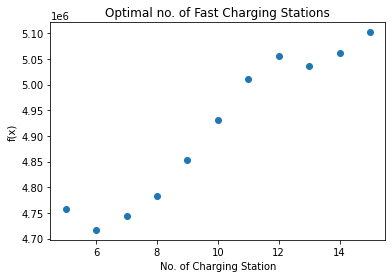

In [10]:
plt.scatter(xaxis,sdcarr)    ##Plotting of Objective Function
plt.title("Optimal no. of Fast Charging Stations")
plt.xlabel("No. of Charging Station")
plt.ylabel("f(x)")
plt.show()

In [11]:
optimal_fcs=xaxis[sdcarr.index(min(sdcarr))]         ##Min number of FCs required.
optimal_fcs


6

In [12]:
zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
xaxis.append(ns)

for j in range(1,181):

    dist=100000000
    h=0
    lis=xyfc(optimal_fcs)
    for i in lis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(lis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)
        
zdata

,zone,st
0,1,3
1,2,3
2,3,2
3,4,2
4,5,2
...,...,...
175,176,6
176,177,6
177,178,6
178,179,6


In [13]:
xy_buses=[]
x_bus=list(busxy['x'])
y_bus=list(busxy['y'])

for i in range(len(x_bus)):
    x=[x_bus[i],y_bus[i]]
    xy_buses.append(x)
xy_buses

[[0, 9],
 [0, 5],
 [0, 3],
 [1, 9],
 [1, 6],
 [1, 5],
 [1, 4],
 [1, 3],
 [1, 2],
 [2, 9],
 [2, 8],
 [2, 7],
 [2, 6],
 [2, 4],
 [2, 3],
 [2, 2],
 [2, 1],
 [3, 10],
 [3, 9],
 [3, 8],
 [3, 7],
 [3, 6],
 [3, 5],
 [3, 4],
 [3, 3],
 [3, 2],
 [3, 1],
 [4, 9],
 [4, 8],
 [4, 7],
 [4, 6],
 [4, 5],
 [4, 4],
 [4, 3],
 [4, 2],
 [4, 1],
 [5, 11],
 [5, 10],
 [5, 9],
 [5, 8],
 [5, 7],
 [5, 6],
 [5, 5],
 [5, 4],
 [5, 3],
 [5, 2],
 [6, 10],
 [6, 9],
 [6, 8],
 [6, 7],
 [6, 6],
 [6, 5],
 [6, 3],
 [6, 2],
 [7, 10],
 [7, 9],
 [7, 8],
 [7, 7],
 [7, 6],
 [7, 5],
 [7, 4],
 [7, 2],
 [7, 0],
 [8, 10],
 [8, 9],
 [8, 8],
 [8, 6],
 [8, 5],
 [8, 4],
 [8, 3],
 [8, 2],
 [8, 1],
 [9, 10],
 [9, 9],
 [9, 8],
 [9, 7],
 [9, 6],
 [9, 5],
 [9, 4],
 [9, 3],
 [9, 2],
 [10, 11],
 [10, 10],
 [10, 9],
 [10, 8],
 [10, 7],
 [10, 6],
 [10, 5],
 [10, 4],
 [10, 3],
 [10, 2],
 [11, 10],
 [11, 8],
 [11, 7],
 [11, 6],
 [11, 5],
 [11, 4],
 [11, 3],
 [11, 2],
 [12, 11],
 [12, 9],
 [12, 8],
 [12, 7],
 [12, 6],
 [12, 5],
 [12, 4],
 [12, 3],


In [14]:
ran_pop=[]
for i in range(100):
    rand=random.sample(xy_buses, optimal_fcs)
    ran_pop.append(rand)
print(ran_pop[:10])

[[[4, 8], [2, 1], [2, 7], [4, 5], [12, 9], [5, 10]], [[2, 3], [7, 2], [9, 2], [4, 4], [3, 8], [11, 2]], [[13, 3], [4, 3], [3, 8], [10, 9], [2, 3], [8, 2]], [[10, 7], [10, 11], [10, 3], [4, 1], [10, 6], [3, 4]], [[4, 8], [13, 6], [2, 2], [11, 2], [1, 2], [7, 7]], [[3, 1], [3, 10], [9, 8], [0, 5], [13, 3], [10, 9]], [[9, 4], [4, 9], [4, 1], [5, 6], [14, 7], [5, 8]], [[10, 6], [0, 9], [8, 5], [8, 1], [2, 1], [7, 7]], [[9, 2], [7, 7], [13, 4], [7, 9], [13, 3], [11, 2]], [[8, 5], [2, 3], [4, 1], [5, 9], [12, 11], [2, 2]]]


In [15]:
len(ran_pop)

100

In [16]:
network=pypsa.Network()

nbus=118
for i in range(1,nbus+1):
    network.add("Bus","Bus No {}".format(i),v_nom=138)


    
print(network.buses)

attribute   v_nom type    x    y carrier  unit  v_mag_pu_set  v_mag_pu_min  \
Bus No 1    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 2    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 3    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 4    138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 5    138.0       0.0  0.0      AC  None           1.0           0.0   
...           ...  ...  ...  ...     ...   ...           ...           ...   
Bus No 114  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 115  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 116  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 117  138.0       0.0  0.0      AC  None           1.0           0.0   
Bus No 118  138.0       0.0  0.0      AC  None           1.0           0.0   

attribute   v_mag_pu_max control sub_network  
Bus No 1        

In [17]:
line_data=pd.read_excel("line_data.xlsx")
line_data

,fbus,tbus,r,x
0,1,2,0.03030,0.09990
1,1,3,0.01290,0.04240
2,4,5,0.00176,0.00798
3,3,5,0.02410,0.10800
4,5,6,0.01190,0.05400
...,...,...,...,...
181,114,115,0.00230,0.01040
182,68,116,0.00034,0.00405
183,12,117,0.03290,0.14000
184,75,118,0.01450,0.04810


In [18]:
for i in range(186):
    network.add("Line","Line No {}".format(i),bus0="Bus No {}".format(line_data['fbus'][i])
    ,bus1="Bus No {}".format(line_data['tbus'][i]),r=line_data['r'][i],x=line_data['x'][i])
    
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_extendable,s_nom_min,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line No 0,Bus No 1,Bus No 2,,0.09990,0.03030,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 1,Bus No 1,Bus No 3,,0.04240,0.01290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 2,Bus No 4,Bus No 5,,0.00798,0.00176,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 3,Bus No 3,Bus No 5,,0.10800,0.02410,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 4,Bus No 5,Bus No 6,,0.05400,0.01190,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Line No 181,Bus No 114,Bus No 115,,0.01040,0.00230,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 182,Bus No 68,Bus No 116,,0.00405,0.00034,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 183,Bus No 12,Bus No 117,,0.14000,0.03290,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line No 184,Bus No 75,Bus No 118,,0.04810,0.01450,0.0,0.0,0.0,False,0.0,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
network.add("Generator","Slack Gen",bus="Bus No 1",p_set=0,control="Slack")

In [20]:
gen_data=pd.read_excel("generator data.xlsx")
gen_data

,bus no,p_set
0,1,100.0
1,4,100.0
2,6,100.0
3,8,100.0
4,10,550.0
5,12,185.0
6,15,100.0
7,18,100.0
8,19,100.0
9,24,100.0


In [21]:
for i in range(1,54):
    network.add("Generator","Gen No {}".format(i+1),bus="Bus No {}".format(gen_data['bus no'][i]),p_set=gen_data['p_set'][i],control="PV")
    
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Slack Gen,Bus No 1,Slack,,0.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 2,Bus No 4,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 3,Bus No 6,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 4,Bus No 8,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 5,Bus No 10,PV,,0.0,False,0.0,inf,0.0,1.0,550.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 6,Bus No 12,PV,,0.0,False,0.0,inf,0.0,1.0,185.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 7,Bus No 15,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 8,Bus No 18,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 9,Bus No 19,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
Gen No 10,Bus No 24,PV,,0.0,False,0.0,inf,0.0,1.0,100.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [22]:
load_data=pd.read_excel("load data.xlsx")
o=15
for i in range(19):
    network.add("Load","Load No {}".format(o),bus="Bus No {}".format(load_data['Bus'][i]),p_set=load_data['P'][i],q_set=load_data['Q'][i])
    o+=1
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load No 15,Bus No 1,,,541.4,86.6,-1.0
Load No 16,Bus No 3,,,414.0,106.2,-1.0
Load No 17,Bus No 2,,,212.3,95.5,-1.0
Load No 18,Bus No 117,,,212.3,84.9,-1.0
Load No 19,Bus No 12,,,498.9,106.2,-1.0
Load No 20,Bus No 11,,,743.1,244.2,-1.0
Load No 21,Bus No 16,,,265.4,106.2,-1.0
Load No 22,Bus No 18,,,636.9,360.9,-1.0
Load No 23,Bus No 20,,,191.1,31.8,-1.0
Load No 24,Bus No 21,,,148.6,84.9,-1.0


In [23]:
def capFCS(j,zdata):
    z=1
    sum1=0
    while(z<=180):
        var=0
        if(zdata['st'][z-1]==j):
            var=1
        sum1+=(0.1*zonexy['zone'][z-1]*var)
        z+=1
    return sum1*96
    
    

In [24]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev*100

In [25]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
    
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
        
    return abs(nploss*250.57)
        

In [26]:
def evucnew(z,xylis):                           ##Function to calculate EVUC
    vals=0
    j=zdata["st"][z-1]
    x1=zonexy['x'][z-1]
    x2=xylis[j-1][0]
    y1=zonexy['y'][z-1]
    y2=xylis[j-1][1]
    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
    
    vals+=(dist1)*0.142*4*0.98*zonexy['zone'][z-1]*87.7
    
    return vals/20

In [27]:


x=[16,32,48,64,80,96]
ini_evuc = 0
xylis=[]

for busno in x:
    xbus=busxy['x'][busno-1]
    ybus=busxy['y'][busno-1]
    xylis.append([xbus,ybus])

zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
for j in range(1,181):

    dist=100000000
    h=0

    for i in xylis:
        x1=zonexy['x'][j-1]
        x2=i[0]
        y1=zonexy['y'][j-1]
        y2=i[1]

        dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
        if(dist1<dist):
            dist=dist1
            h=(xylis.index(i))+1

    df2 = {'st': h, 'zone':j}
    zdata = zdata.append(df2, ignore_index = True)

    
for zon in range(1,181):
    ini_evuc+=evucnew(zon,xylis)
    
ini_npl=f3(x)
ini_mvd=f2(x)
print("Evuc,mvd,npl")
print(ini_evuc,ini_mvd,ini_npl)
    
  

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.082981 seconds


[16, 32, 48, 64, 80, 96]
[[2, 2], [4, 5], [6, 9], [8, 10], [9, 3], [11, 5]]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.087998 seconds


Evuc,mvd,npl
8679.358507829016 0.290594446987269 208613.05615679195


In [28]:
def solver(position,swarm_size,list_of_functions):
    
    for i in range(0, swarm_size):
        xylis=[]


        x=list(position[i,0:position.shape[1]-len(list_of_functions)])
        x=[int(u) for u in x ]
        print(x)
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for j in range(1,181):

            dist=100000000
            h=0

            for si in xylis:
                x1=zonexy['x'][j-1]
                x2=si[0]
                y1=zonexy['y'][j-1]
                y2=si[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(si))+1

            df2 = {'st': h, 'zone':j}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network

        for k in range (1, len(list_of_functions) + 1):

            position[i,-k] = list_of_functions[-k](list(position[i,0:position.shape[1]-len(list_of_functions)]),zdata,xylis,df3)
    return position 


In [29]:
def initial_position(swarm_size = 5, min_values = [1,1,1,1,1,1], max_values = [118,118,118,118,118,118], list_of_functions = []):
    position = np.zeros((swarm_size, len(min_values) + len(list_of_functions)))
    for i in range(0, swarm_size):
        varran=[x for x in range(1,119)]
        
        ifeat = random.sample(varran,6)
        for j in range(0,len(min_values)):
            position[i,j]=ifeat[j]
            
                
        xylis=[]
            
            
        x=list(position[i,0:position.shape[1]-len(list_of_functions)])
        x=[int(i) for i in x ]
        print(x)
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for dj in range(1,181):

            dist=100000000
            h=0

            for si in xylis:
                x1=zonexy['x'][dj-1]
                x2=si[0]
                y1=zonexy['y'][dj-1]
                y2=si[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(si))+1

            df2 = {'st': h, 'zone':dj}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network
                
        for k in range (1, len(list_of_functions) + 1):
            
            posxval = list_of_functions[-k](list(position[i,0:position.shape[1]-len(list_of_functions)]),zdata,xylis,df3)
            #print(posxval)
            position[i,-k]=posxval
    return position 

# Function: Updtade Position
def update_position(position, velocity, min_values = [-5,-5], max_values = [5,5], list_of_functions = []):
    for i in range(0, position.shape[0]):
        for j in range(0, len(min_values)):
            posval = (position[i,j] + velocity[i,j])
            if(posval==0):
                posval=1
            if(posval!=118):
                posval=posval%118
            position[i,j]=posval
       
        position.astype(int)
        
        for k in range (1, len(list_of_functions) + 1):
            xylis=[]
            x=list(position[i,0:position.shape[1]-len(list_of_functions)])
            
            x=[int(u) for u in x ]
            if(0 in x):
                ind=x.index(0)
                x[ind]=1
            print(x)
            for busno in x:
                xbus=busxy['x'][busno-1]
                ybus=busxy['y'][busno-1]
                xylis.append([xbus,ybus])

            zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
            for dj in range(1,181):

                dist=100000000
                h=0

                for st in xylis:
                    x1=zonexy['x'][j-1]
                    x2=st[0]
                    y1=zonexy['y'][j-1]
                    y2=st[1]

                    dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                    if(dist1<dist):
                        dist=dist1
                        h=(xylis.index(st))+1

                df2 = {'st': h, 'zone':dj}
                zdata = zdata.append(df2, ignore_index = True)
                
            r=1
            for s in x:
                network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
                r+=1
            network.pf()
            df3 = network
            
            position[i,-k] = list_of_functions[-k](list(position[i,0:position.shape[1]-len(list_of_functions)]),zdata,xylis,df3)
            print(position[i,-k])
            if(k==2):
                for mi in range(1,7):
                    network.remove("Load","Load No {}".format(mi))
    return position

# Function: Initialize Velocity
def initial_velocity(position, min_values = [-5,-5], max_values = [5,5]):
    velocity = np.zeros((position.shape[0], len(min_values)))
    for i in range(0, velocity.shape[0]):
        varrane=[x for x in range(1,119)]
        
        ifeate = random.sample(varrane,6)
        for j in range(0,len(min_values)):
            velocity[i,j]=ifeate[j]
    return velocity

# Function: Velocity
def velocity_vector(position, velocity_, archive, M, min_values = [-5,-5], max_values = [5,5]):
    r1  = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
    r2  = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
    w   = np.random.uniform(low = 0.1, high = 0.5, size = 1)[0]
    c1  = np.random.uniform(low = 1.5, high = 2.0, size = 1)[0]
    c2  = np.random.uniform(low = 1.5, high = 2.5, size = 1)[0]
    velocity = np.zeros((position.shape[0], velocity_.shape[1]))
    crowding = crowding_distance_function(archive, M)
    if (archive.shape[0] > 2):
        ind_1, ind_2 = random.sample(range(0, len(archive) - 1), 2)
        if (crowding[ind_1,0] < crowding[ind_2,0]):
            ind_1, ind_2 = ind_2, ind_1
    else:
        ind_1 = 0
        ind_2 = 0
    for i in range(0, velocity.shape[0]):
        for j in range(0, velocity.shape[1]):
            velocity[i,j] = w*velocity_[i,j] + c1*r1*(archive[ind_1, j] - position[i,j]) + c2*r2*(archive[ind_2, j] - position[i,j])
    return velocity

############################################################################

# Function: Dominance
def dominance_function(solution_1, solution_2, number_of_functions = 2):
    count     = 0
    dominance = True
    for k in range (1, number_of_functions + 1):
        if (solution_1[-k] <= solution_2[-k]):
            count = count + 1
    if (count == number_of_functions):
        dominance = True
    else:
        dominance = False       
    return dominance

# Function: Fast Non-Dominated Sorting
def fast_non_dominated_sorting(position, number_of_functions = 2):
    S     = [[] for i in range(0, position.shape[0])]
    front = [[]]
    n     = [0 for i in range(0, position.shape[0])]
    rank  = [0 for i in range(0, position.shape[0])]
    for p in range(0, position.shape[0]):
        S[p] = []
        n[p] = 0
        for q in range(0, position.shape[0]):
            if (dominance_function(solution_1 = position[p,:], solution_2 = position[q,:], number_of_functions = number_of_functions)):
                if (q not in S[p]):
                    S[p].append(q)
            elif (dominance_function(solution_1 = position[q,:], solution_2 = position[p,:], number_of_functions = number_of_functions)):
                n[p] = n[p] + 1
        if (n[p] == 0):
            rank[p] = 0
            if (p not in front[0]):
                front[0].append(p)
    i = 0
    while (front[i] != []):
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] = n[q] - 1
                if(n[q] == 0):
                    rank[q] = i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    rank = np.zeros((position.shape[0], 1))
    for i in range(0, len(front)):
        for j in range(0, len(front[i])):
            rank[front[i][j], 0] = i + 1
    return rank

# Function: Crowding Distance (Adapted from PYMOO)
def crowding_distance_function(pop, M):
    infinity = 1e+11
    position = copy.deepcopy(pop[:,-M:])
    position =  position.reshape((pop.shape[0], M))
    if (position.shape[0] <= 2):
        return np.full( position.shape[0], infinity)
    else:
        arg_1    = np.argsort( position, axis = 0, kind = 'mergesort')
        position = position[arg_1, np.arange(M)]
        dist     = np.concatenate([ position, np.full((1, M), np.inf)]) - np.concatenate([np.full((1, M), -np.inf), position])
        idx      = np.where(dist == 0)
        a        = np.copy(dist)
        b        = np.copy(dist)
        for i, j in zip(*idx):
            a[i, j] = a[i - 1, j]
        for i, j in reversed(list(zip(*idx))):
            b[i, j] = b[i + 1, j]
        norm            = np.max( position, axis = 0) - np.min(position, axis = 0)
        norm[norm == 0] = np.nan
        a, b            = a[:-1]/norm, b[1:]/norm
        a[np.isnan(a)]  = 0.0
        b[np.isnan(b)]  = 0.0
        arg_2           = np.argsort(arg_1, axis = 0)
        crowding        = np.sum(a[arg_2, np.arange(M)] + b[arg_2, np.arange(M)], axis = 1) / M
    crowding[np.isinf(crowding)] = infinity
    crowding                     = crowding.reshape((-1,1))
    return crowding

############################################################################

# Function: Selection
def selection(position, archive, M):
    archive = np.vstack([position, archive])
    rank    = fast_non_dominated_sorting(archive, M)
    arg     = np.argsort(rank , axis = 0).tolist()
    arg     = [i[0] for i in arg]
    archive = archive[arg, :]
    rank    = rank[arg, :]
    idx     = np.where(rank == 1)[0]
    if (len(idx) > 1):
        archive = archive[idx, :]
    archive = archive[:2*position.shape[0], :]
    return archive

############################################################################

# Function: Mutation
def mutation(position, mutation_rate = 0.1, eta = 1, min_values = [-5,-5], max_values = [5,5], list_of_functions=[]):
    d_mutation = 0            
    for i in range (0, position.shape[0]):
        xylis=[]
        x=list(position[i,0:position.shape[1]-len(list_of_functions)])

        x=[int(u) for u in x ]
        print(x)
        if(0 in x):
                ind=x.index(0)
                x[ind]=1
        for busno in x:
            xbus=busxy['x'][busno-1]
            ybus=busxy['y'][busno-1]
            xylis.append([xbus,ybus])

        zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
        for j in range(1,181):

            dist=100000000
            h=0

            for st in xylis:
                x1=zonexy['x'][j-1]
                x2=st[0]
                y1=zonexy['y'][j-1]
                y2=st[1]

                dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
                if(dist1<dist):
                    dist=dist1
                    h=(xylis.index(st))+1

            df2 = {'st': h, 'zone':j}
            zdata = zdata.append(df2, ignore_index = True)

        r=1
        for s in x:
            network.add("Load","Load No {}".format(r),bus = "Bus No {}".format(s),p_set=capFCS(r,zdata),q_set=200)
            r+=1
        network.pf()
        df3 = network
        for j in range(0, position.shape[1] - len(list_of_functions)):
            probability = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (probability < mutation_rate):
                rand   = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                rand_d = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)                                     
                if (rand <= 0.5):
                    d_mutation = 2*(rand_d)
                    d_mutation = d_mutation**(1/(eta + 1)) - 1
                elif (rand > 0.5):  
                    d_mutation = 2*(1 - rand_d)
                    d_mutation = 1 - d_mutation**(1/(eta + 1))                
                posval = (position[i,j] + d_mutation)
                if(posval==0):
                    posval=1
                if(posval!=118):
                    posval=posval%118
                position[i,j]=posval                        
        for k in range (1, len(list_of_functions) + 1):
            position[i,-k] = list_of_functions[-k](position[i,0:position.shape[1]-len(list_of_functions)],zdata,xylis,df3)
    return position

############################################################################

# OMPSO Function
def optimized_multiobjective_particle_swarm_optimization(swarm_size = 5, min_values = [-5,-5], max_values = [5,5], iterations = 50, list_of_functions = [], mutation_rate = 0.1, eta = 3):    
    count    = 0
    M        = len(list_of_functions)
    position = initial_position( swarm_size, min_values, max_values, list_of_functions)
    archive  = copy.deepcopy(position)
    
    velocity = initial_velocity(position, min_values, max_values)
    while (count <= iterations):
        #print(position)
        
        print(colored('Generation = ', 'red', attrs=['bold']), count)
        position = update_position(position, velocity, min_values, max_values, list_of_functions) 
        position = mutation(position, mutation_rate, eta, min_values, max_values, list_of_functions)
        archive  = selection(position, archive, M)
        
        velocity = velocity_vector(position, velocity, archive, M, min_values, max_values)         
        count    = count + 1       
    return archive

In [30]:
import math
 
def minimax (curDepth, nodeIndex,
             maxTurn, scores,
             targetDepth):
 
    # base case : targetDepth reached
    if (curDepth == targetDepth):
        return scores[nodeIndex]
     
    if (maxTurn):
        return max(minimax(curDepth + 1, nodeIndex * 2,
                    False, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                    False, scores, targetDepth))
     
    else:
        return min(minimax(curDepth + 1, nodeIndex * 2,
                     True, scores, targetDepth),
                   minimax(curDepth + 1, nodeIndex * 2 + 1,
                     True, scores, targetDepth))
     
# Driver code


In [31]:
def f3(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df3 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df3.p0.iloc[0][i]+df3.p1.iloc[0][i])
        
        
    return abs(nploss)
        

##  CASE 1

In [32]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load No 15,Bus No 1,,,541.4,86.6,-1.0
Load No 16,Bus No 3,,,414.0,106.2,-1.0
Load No 17,Bus No 2,,,212.3,95.5,-1.0
Load No 18,Bus No 117,,,212.3,84.9,-1.0
Load No 19,Bus No 12,,,498.9,106.2,-1.0
Load No 20,Bus No 11,,,743.1,244.2,-1.0
Load No 21,Bus No 16,,,265.4,106.2,-1.0
Load No 22,Bus No 18,,,636.9,360.9,-1.0
Load No 23,Bus No 20,,,191.1,31.8,-1.0
Load No 24,Bus No 21,,,148.6,84.9,-1.0


In [33]:
network.remove("Load","Load No {}".format(1)) 
network.loads

KeyError: "['Load No 1'] not found in axis"

In [33]:
from termcolor import colored

In [34]:

import matplotlib.pyplot as plt
import math
import os

def f1(x,zdata,xylis,df3):
    s = 0
    
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    
    return s

def f2(x,zdata,xylis,df3):
    
   
    nploss=0
    df5 = df3.lines_t
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        
        network.remove("Load","Load No {}".format(i)) 
    
    return abs(nploss*87.7)

size = 5
m_r  = 0.15
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1,f2]
gen  = 3
mu   = 2
eta  = 3


# Calling OMOPSO Function
omopso_kursawe = optimized_multiobjective_particle_swarm_optimization(swarm_size = size, min_values = minv, max_values = maxv, iterations = gen, list_of_functions = lof, mutation_rate = m_r, eta = eta)

[65, 109, 19, 87, 96, 15]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.055999 seconds


[68, 54, 69, 65, 113, 49]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050036 seconds


[113, 105, 108, 1, 13, 98]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040000 seconds


[20, 55, 83, 58, 114, 89]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050041 seconds


[109, 55, 112, 50, 73, 116]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


Generation =  0
[45, 1, 84, 96, 22, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030006 seconds


11956.479651755562
[45, 1, 84, 96, 22, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040000 seconds


24922.48679360349
[6, 16, 96, 59, 28, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030004 seconds


36024.48153239625
[6, 16, 96, 59, 28, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.032105 seconds


21606.925391438992
[112, 23, 118, 84, 64, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.038141 seconds


99271.85168545364
[112, 23, 118, 84, 64, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


26951.37111151154
[118, 41, 81, 49, 67, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039996 seconds


128772.28731850082
[118, 41, 81, 49, 67, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040008 seconds


20957.019181128067
[91, 2, 81, 85, 105, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039999 seconds


28105.67354471812
[91, 2, 81, 85, 105, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030044 seconds


20653.658286507565
[45, 1, 84, 96, 22, 12]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046109 seconds


[6, 16, 96, 59, 28, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059999 seconds


[112, 23, 118, 84, 64, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


[118, 41, 81, 49, 67, 84]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050099 seconds


[91, 2, 81, 85, 105, 59]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050039 seconds


Generation =  1
[21, 47, 115, 53, 90, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040003 seconds


28119.169044518334
[21, 47, 115, 53, 90, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040002 seconds


27437.223226137197
[9, 71, 100, 94, 86, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050037 seconds


203096.60213605725
[9, 71, 100, 94, 86, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


18296.649271944036
[23, 55, 92, 81, 89, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049965 seconds


99264.08037764733
[23, 55, 92, 81, 89, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.039966 seconds


17799.3379343206
[15, 78, 16, 93, 96, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


62101.64707006268
[15, 78, 16, 93, 96, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


16173.295765902221
[18, 67, 5, 63, 79, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040001 seconds


32121.56983876606
[18, 67, 5, 63, 79, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038136 seconds


18991.0900813657
[21, 47, 115, 53, 90, 2]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[9, 71, 100, 94, 86, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050104 seconds


[23, 55, 92, 81, 89, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[15, 78, 16, 93, 96, 114]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048108 seconds


[18, 67, 5, 63, 79, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049993 seconds


Generation =  2
[73, 29, 77, 69, 105, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050010 seconds


113082.08630123035
[73, 29, 77, 69, 105, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050039 seconds


20296.049591722232
[74, 35, 71, 87, 103, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050011 seconds


98504.23875743849
[74, 35, 71, 87, 103, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


23849.62967679448
[66, 29, 65, 79, 100, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050032 seconds


113086.73155925119
[66, 29, 65, 79, 100, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.042360 seconds


22751.087844843798
[62, 35, 59, 88, 102, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050061 seconds


98513.31738208831
[62, 35, 59, 88, 102, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


19285.40345512736
[67, 36, 55, 73, 92, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


98639.34475371969
[67, 36, 55, 73, 92, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058793 seconds


19581.543020674326
[73, 29, 77, 69, 105, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060312 seconds


[74, 35, 71, 87, 103, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.061878 seconds


[66, 29, 65, 79, 100, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.072038 seconds


[62, 35, 59, 88, 102, 81]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056000 seconds


[67, 36, 55, 73, 92, 78]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060066 seconds


Generation =  3
[28, 37, 82, 90, 69, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.067349 seconds


116122.23445585603
[28, 37, 82, 90, 69, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050040 seconds


18797.421333975497
[29, 20, 98, 46, 74, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048015 seconds


103447.12271085117
[29, 20, 98, 46, 74, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051461 seconds


22389.363717983426
[43, 36, 110, 63, 79, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048344 seconds


134248.1801676969
[43, 36, 110, 63, 79, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds


23170.86075691843
[51, 20, 22, 43, 74, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060046 seconds


103512.80747035694
[51, 20, 22, 43, 74, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049962 seconds


19893.536277369687
[42, 20, 31, 78, 98, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.057182 seconds


103450.06495302984
[42, 20, 31, 78, 98, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047360 seconds


15168.239558512681
[28, 37, 82, 90, 69, 112]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049963 seconds


[29, 20, 98, 46, 74, 85]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049964 seconds


[43, 36, 110, 63, 79, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070005 seconds


[51, 20, 22, 43, 74, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050036 seconds


[42, 20, 31, 78, 98, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048096 seconds


In [35]:
print(omopso_kursawe)


[[4.21866567e+01 2.06390006e+01 3.13409559e+01 7.89134019e+01
  9.80512615e+01 6.96945850e+01 1.51682396e+04 8.77185435e+04]
 [1.56502886e+01 7.85719234e+01 1.63067979e+01 9.39931471e+01
  9.69969212e+01 1.14171752e+02 1.61732958e+04 7.01753683e+04]
 [1.85515927e+01 6.74002477e+01 5.73156020e+00 6.37789715e+01
  8.03290093e+01 9.67908911e+01 1.89910901e+04 5.49804603e+04]
 [9.10000000e+01 2.00000000e+00 8.10000000e+01 8.50000000e+01
  1.05045049e+02 5.90000000e+01 2.06536583e+04 5.38092545e+04]
 [1.13000000e+02 1.05000000e+02 1.08000000e+02 1.00000000e+00
  1.30000000e+01 9.80000000e+01 3.17364985e+04 3.57153082e+04]]


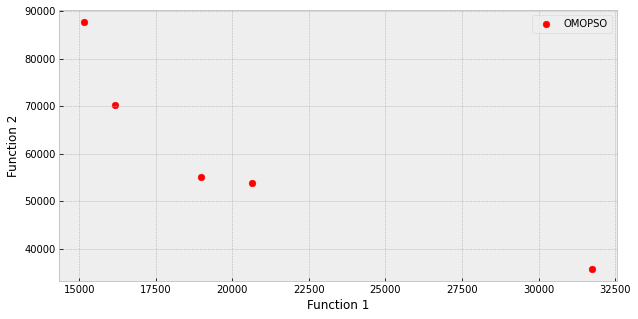

In [36]:
plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
plt.scatter(omopso_kursawe[:,-2], omopso_kursawe[:,-1], c = 'r', s = 45, marker = 'o', label = 'OMOPSO')
##plt.scatter(kursawe_1,          kursawe_2,             c = 'k', s = 2,  marker = '.', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()

In [37]:
func=[]
func1=omopso_kursawe[:,-2]
func2=omopso_kursawe[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i]])
    
print(func)


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in omopso_kursawe:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])

[[15168.239558512681, 87718.54353458031], [16173.295765902221, 70175.368321808], [18991.0900813657, 54980.46025148303], [20653.658286507565, 53809.254501270916], [31736.498545216535, 35715.30822314774]]
The optimal value is : [18991.0900813657, 54980.46025148303]
[18, 67, 5, 63, 80, 96]


In [233]:
for i in range(1,7):
    network.remove("Load","Load No {}".format(i)) 

In [38]:
import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,df3):
    r=1
    df1=df3.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)
    
    return vdev*100

def f2(x,zdata,xylis,df3):
    df5 = df3.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df5.p0.iloc[0][i]+df5.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i)) 
    return abs(nploss*250.57)

size = 5
m_r  = 0.15
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1,f2]
gen  = 3
mu   = 2
eta  = 3


# Calling OMOPSO Function
omopso_kursawe = optimized_multiobjective_particle_swarm_optimization(swarm_size = size, min_values = minv, max_values = maxv, iterations = gen, list_of_functions = lof, mutation_rate = m_r, eta = eta)

[15, 53, 96, 67, 59, 16]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050042 seconds


[4, 28, 26, 52, 89, 105]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040535 seconds


[6, 107, 51, 58, 67, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056004 seconds


[28, 109, 10, 105, 91, 86]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


[108, 9, 57, 61, 42, 6]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


Generation =  0
[36, 27, 109, 25, 86, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046135 seconds


281428.9552860302
[36, 27, 109, 25, 86, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049997 seconds


0.09928850010647583
[43, 100, 100, 62, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040003 seconds


80327.52270968679
[43, 100, 100, 62, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040000 seconds


1.0953092567010936
[3, 23, 18, 87, 81, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058057 seconds


284110.83953599265
[3, 23, 18, 87, 81, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


0.5427601295012741
[44, 11, 72, 111, 41, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038064 seconds


82432.57452437883
[44, 11, 72, 111, 41, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040002 seconds


0.38751551470628254
[97, 80, 15, 115, 74, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.043409 seconds


34139.20224297471
[97, 80, 15, 115, 74, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040000 seconds


0.24487544553050133
[36, 27, 109, 25, 86, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048108 seconds


[43, 100, 100, 62, 2, 57]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060007 seconds


[3, 23, 18, 87, 81, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048103 seconds


[44, 11, 72, 111, 41, 111]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048123 seconds


[97, 80, 15, 115, 74, 1]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.051599 seconds


Generation =  1
[37, 27, 51, 92, 68, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.058124 seconds


383042.3789634284
[37, 27, 51, 92, 68, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


2.0172391460428596
[34, 76, 71, 46, 26, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049966 seconds


263695.2735656127
[34, 76, 71, 46, 26, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048017 seconds


0.11465026594300598
[85, 19, 29, 27, 70, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052126 seconds


210599.88889918357
[85, 19, 29, 27, 70, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


0.27961786952707124
[29, 27, 94, 2, 116, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040034 seconds


80308.54333038011
[29, 27, 94, 2, 116, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040006 seconds


1.0953090806909982
[1, 93, 29, 7, 80, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040004 seconds


34151.035242772545
[1, 93, 29, 7, 80, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039966 seconds


0.24487937646546776
[37, 27, 51, 92, 68, 52]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[34, 76, 71, 46, 26, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


[85, 19, 29, 27, 70, 39]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048069 seconds


[29, 27, 94, 2, 116, 25]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049962 seconds


[0, 93, 29, 7, 80, 23]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070000 seconds


Generation =  2
[54, 89, 57, 44, 22, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049998 seconds


359150.4434527556
[54, 89, 57, 44, 22, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


2.574164254942779
[53, 69, 43, 70, 40, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


336594.48493642185
[53, 69, 43, 70, 40, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


0.12628638054569263
[24, 98, 61, 75, 22, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049959 seconds


359121.3705111764
[24, 98, 61, 75, 22, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049962 seconds


2.5741726562439116
[57, 97, 35, 88, 116, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


281476.9297202326
[57, 97, 35, 88, 116, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


0.17072107267190884
[60, 62, 62, 81, 16, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


106069.86527291113
[60, 62, 62, 81, 16, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.040039 seconds


1.454363753411947
[54, 89, 57, 44, 22, 58]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044627 seconds


[53, 69, 43, 70, 40, 46]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050041 seconds


[24, 98, 61, 75, 22, 69]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds


[57, 97, 35, 88, 116, 74]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059964 seconds


[60, 62, 62, 81, 16, 67]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.071970 seconds


Generation =  3
[75, 115, 38, 58, 18, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048917 seconds


222766.7217188713
[75, 115, 38, 58, 18, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049715 seconds


0.1894672418977783
[75, 67, 25, 85, 64, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050036 seconds


294505.5161367213
[75, 67, 25, 85, 64, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048285 seconds


0.1295109299995545
[46, 5, 70, 92, 18, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039999 seconds


91748.04797258766
[46, 5, 70, 92, 18, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039961 seconds


0.41130288093385037
[79, 2, 15, 106, 45, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.042429 seconds


80330.67096834983
[79, 2, 15, 106, 45, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.037779 seconds


1.0953092825034427
[87, 59, 71, 100, 12, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038235 seconds


72115.13164945222
[87, 59, 71, 100, 12, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040005 seconds


0.1768319405516472
[75, 115, 38, 58, 18, 44]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054044 seconds


[75, 67, 25, 85, 64, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[46, 5, 70, 92, 18, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


[79, 2, 15, 106, 45, 61]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.061079 seconds


[87, 59, 71, 100, 12, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.081208 seconds


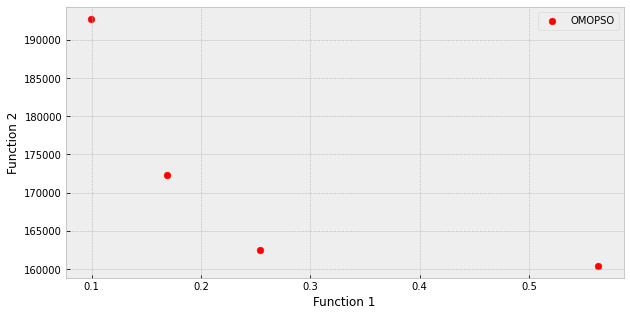

NameError: name 'paes_kursawe1' is not defined

In [41]:
plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
plt.scatter(omopso_kursawe[:,-2], omopso_kursawe[:,-1], c = 'r', s = 45, marker = 'o', label = 'OMOPSO')
##plt.scatter(kursawe_1,          kursawe_2,             c = 'k', s = 2,  marker = '.', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()


func=[]
func1=omopso_kursawe[:,-2]
func2=omopso_kursawe[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i]])
    
#print(func)


treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)

for i in omopso_kursawe:
    if(minimaxval[0] in i):
        xlist=i
        
xlist=[int(i) for i in xlist]
print(xlist[:6])

In [40]:
def f2(x):
    xylis=[]
    print(x)
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    print(xylis)
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        k=1
       
    for i in x:
        network.add("Load","Load No {}".format(k),bus = "Bus No {}".format(i),p_set=capFCS(k,zdata),q_set=200)
        k+=1
    network.pf()
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=1-mini
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))
    return vdev


mvd=f2(final_placement)
print(mvd,minimaxval)

NameError: name 'final_placement' is not defined

In [44]:
for i in range(1,7):
    network.remove("Load","Load No {}".format(i)) 

[74, 34, 6, 105, 98, 64]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[16, 41, 97, 67, 47, 35]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050005 seconds


[93, 78, 39, 90, 32, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[64, 40, 47, 13, 27, 63]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056066 seconds


[88, 80, 23, 57, 24, 97]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050008 seconds


Generation =  0
[84, 18, 18, 24, 72, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050006 seconds


222729.30222650047
[84, 18, 18, 24, 72, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046070 seconds


0.18947873704020513
[31, 64, 13, 31, 10, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


120963.48976496219
[31, 64, 13, 31, 10, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050008 seconds


1.8577160296800677
[56, 57, 94, 55, 74, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


400143.18870814505
[56, 57, 94, 55, 74, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056063 seconds


2.2011951628463033
[97, 68, 94, 79, 64, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050001 seconds


306830.32364527613
[97, 68, 94, 79, 64, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


2.1536732438515727
[48, 6, 86, 104, 66, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038090 seconds


102890.53527610269
[48, 6, 86, 104, 66, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034110 seconds


0.27532993655990934
[84, 18, 18, 24, 72, 9]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


[31, 64, 13, 31, 10, 94]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048043 seconds


[56, 57, 94, 55, 74, 96]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060037 seconds


[97, 68, 94, 79, 64, 33]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060002 seconds


[48, 6, 86, 104, 66, 92]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000001 in 0.040036 seconds


Generation =  1
[50, 64, 42, 88, 16, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050004 seconds


367944.1849283074
[50, 64, 42, 88, 16, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050034 seconds


0.9725216740609666
[111, 108, 54, 93, 83, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049998 seconds


326320.5400333066
[111, 108, 54, 93, 83, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046098 seconds


0.09928850010647583
[101, 18, 86, 66, 1, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030000 seconds


34155.37237204619
[101, 18, 86, 66, 1, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.036039 seconds


0.24487168566154072
[41, 104, 83, 34, 10, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.070002 seconds


591369.8447043087
[41, 104, 83, 34, 10, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060003 seconds


0.18478566207849045
[109, 61, 97, 1, 9, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.059997 seconds


34159.23715839188
[109, 61, 97, 1, 9, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040003 seconds


0.24487096242427064
[50, 64, 42, 88, 16, 41]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050004 seconds


[111, 108, 54, 93, 83, 62]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050007 seconds


[101, 18, 86, 66, 0, 48]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048085 seconds


[41, 104, 83, 34, 10, 21]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[109, 61, 97, 0, 9, 79]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.056033 seconds


Generation =  2
[18, 35, 60, 75, 22, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050117 seconds


359124.33208312315
[18, 35, 60, 75, 22, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050002 seconds


2.574166669147704
[84, 49, 49, 67, 86, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050031 seconds


295030.037825091
[84, 49, 49, 67, 86, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


0.09928850010646473
[88, 73, 64, 90, 40, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060007 seconds


336581.7743040088
[88, 73, 64, 90, 40, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054508 seconds


0.09928850010647583
[23, 51, 67, 1, 32, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.057952 seconds


34156.754751619585
[23, 51, 67, 1, 32, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.048039 seconds


0.24488466103544937
[81, 42, 54, 30, 33, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054151 seconds


294741.41122150456
[81, 42, 54, 30, 33, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.053152 seconds


0.13033663555118702
[18, 35, 60, 75, 22, 45]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049960 seconds


[84, 49, 49, 67, 86, 72]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060006 seconds


[88, 73, 64, 90, 40, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050004 seconds


[23, 51, 67, 0, 32, 60]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[81, 42, 54, 30, 33, 54]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054104 seconds


Generation =  3
[50, 61, 107, 87, 50, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.048054 seconds


359151.7546008494
[50, 61, 107, 87, 50, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.059957 seconds


2.5741721204835977
[99, 1, 103, 85, 97, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.040225 seconds


34139.25051253444
[99, 1, 103, 85, 97, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.034093 seconds


0.24487540485400583
[103, 77, 47, 95, 56, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054112 seconds


336964.02621732466
[103, 77, 47, 95, 56, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044050 seconds


1.0080785929928004
[53, 1, 47, 35, 52, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.039961 seconds


34172.030492972604
[53, 1, 47, 35, 52, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.030001 seconds


0.2448527267513767
[100, 62, 43, 47, 52, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050003 seconds


383575.15456896106
[100, 62, 43, 47, 52, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.060004 seconds


3.1947079233916154
[50, 61, 107, 87, 50, 22]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.044120 seconds


[99, 0, 103, 85, 97, 88]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.050000 seconds


[103, 77, 47, 95, 56, 93]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.054016 seconds


[53, 1, 47, 35, 52, 30]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


[100, 62, 43, 47, 52, 82]


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.049999 seconds


The optimal value is : [88.30030209555959, 0.1877628012449617, 130978.22566946628]


NameError: name 'evol' is not defined

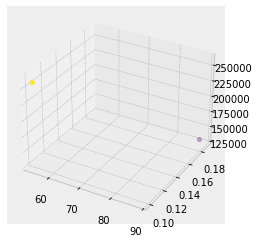

In [46]:

import matplotlib.pyplot as plt
import math

def f1(x,zdata,xylis,network):
    
    
    df1=network.buses_t.v_mag_pu
    mini=100000000000
    for i in range(118):
        if(df1.iloc[0][i]<mini):
            mini=df1.iloc[0][i]
    vdev=(1-mini)*100
    
    return vdev
def f2(x,zdata,xylis,network):
    
    
    df2 = network.lines_t
    nploss=0
    for i in range(186):
        nploss+=(df2.p0.iloc[0][i]+df2.p1.iloc[0][i])
        
    for i in range(1,7):
        network.remove("Load","Load No {}".format(i))  
    return abs(nploss*250.57)

def f3(x,zdata,xylis,network):
    s = 0
    
     
    for zon in range(1,181):
       
        s+=evucnew(zon,xylis)
    
    return s
    

size = 5
m_r  = 0.15
minv = [1,1,1,1,1,1]
maxv = [118,118,118,118,118,118]
lof  = [f1,f2]
gen  = 3
mu   = 2
eta  = 3


# Calling OMOPSO Function
omopso_kursawe = optimized_multiobjective_particle_swarm_optimization(swarm_size = size, min_values = minv, max_values = maxv, iterations = gen, list_of_functions = lof, mutation_rate = m_r, eta = eta)

func=[]
func1=omopso_kursawe[:,-3]
func2=omopso_kursawe[:,-2]
func3=omopso_kursawe[:,-1]
for i in range(len(func1)):
    func.append([func1[i],func2[i],func3[i]])

ax = plt.axes(projection='3d')
function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
function3 = [i[2] for i in func]
ax.scatter3D(function1, function2, function3, c=function3)

treeDepth = math.floor(math.log(len(func), 2))
 
print("The optimal value is : ", end = "")
minimaxval=minimax(0, 0, True, func, treeDepth)
print(minimaxval)
feat=[i.features for i in evol]
for i in range(len(func)):
    if minimaxval[0]==func[i][0]:
        print(feat[i])



In [47]:
import session_info
session_info.show()

In [46]:
def sdcnew(x):
    xylis=[]
    
    for busno in x:
        xbus=busxy['x'][busno-1]
        ybus=busxy['y'][busno-1]
        xylis.append([xbus,ybus])
    
    zdata=pd.read_excel("xy.xlsx",sheet_name="Sheet3")
    for j in range(1,181):

        dist=100000000
        h=0
        
        for i in xylis:
            x1=zonexy['x'][j-1]
            x2=i[0]
            y1=zonexy['y'][j-1]
            y2=i[1]

            dist1=np.sqrt((x2-x1)**2 + (y2-y1)**2)
            if(dist1<dist):
                dist=dist1
                h=(xylis.index(i))+1

        df2 = {'st': h, 'zone':j}
        zdata = zdata.append(df2, ignore_index = True)
        
        
    sdcval=0
    for x in range(1,ns+1):
        
        value=sdc(x)
        sdcval+=value
        
    print(sdcval)

In [48]:
sdcnew([11,56,61,65,78,112])

4993152.576000003


In [49]:
sdcnew([7,12,15,24,70,71])

4993152.576000003
